## **Ryan Chandra Hadi - 1301204125** 





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
url = 'https://raw.githubusercontent.com/bloodsking/Tupro1/main/audit_risk.csv'
url1 = 'https://raw.githubusercontent.com/bloodsking/Tupro1/main/trial.csv'
audit = pd.read_csv(url)
trial = pd.read_csv(url1)

## **Data Pre-processing and Data Cleansing**

In [3]:
audit

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,...,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [4]:
trial

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [5]:
audit.info() # melihat info mengenai semua kolom yang ada di audit

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [6]:
trial.info() # melihat info mengenai semua kolom yang ada di trial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   SCORE_A        776 non-null    int64  
 4   PARA_B         776 non-null    float64
 5   SCORE_B        776 non-null    int64  
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [7]:
audit.describe() # untuk melihat nilai-nilai seperti count, mean, max, dan min pada data audit

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [8]:
trial.describe() # untuk melihat nilai-nilai seperti count, mean, max, dan min pada data trial

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [9]:
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',  'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ] # set nama column pada trial yang sesuai dengan data audit

In [10]:
# Menyesuaikan data pada trial terhadap data audit sebelum di merge
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10

In [11]:
# untuk melihat data yang memiliki kolom yang sama diantara audit dan trial
test = np.intersect1d(audit.columns, trial.columns)
test

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [12]:
# merge dua data set menggunakan outer dengan kolom yang sama dengan data audit
merged = pd.merge(audit, trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B', 
                                                   'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])
merged.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

In [13]:
# Men-drop semua isi dari kolom data Risk_Trial karena sudah tidak berguna
df = merged.drop(['Risk_trial'], axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    810 non-null    float64
 1   LOCATION_ID     810 non-null    object 
 2   PARA_A          810 non-null    float64
 3   Score_A         810 non-null    float64
 4   Risk_A          810 non-null    float64
 5   PARA_B          810 non-null    float64
 6   Score_B         810 non-null    float64
 7   Risk_B          810 non-null    float64
 8   TOTAL           810 non-null    float64
 9   numbers         810 non-null    float64
 10  Score_B.1       810 non-null    float64
 11  Risk_C          810 non-null    float64
 12  Money_Value     809 non-null    float64
 13  Score_MV        810 non-null    float64
 14  Risk_D          810 non-null    float64
 15  District_Loss   810 non-null    int64  
 16  PROB            810 non-null    float64
 17  RiSk_E          810 non-null    flo

In [15]:
# mengisi nilai yang ada di kolom money_value jika ada yang kosong dengan nilai median dari kolom money value itu sendiri
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

In [16]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,...,810.000000,810.0,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,21.406716,2.348556,0.344938,1.294561,10.347643,0.308395,6.068334,12.665829,5.064815,0.222716,...,0.567407,0.5,6.881682,0.379012,2.227160,2.871605,2.493827,0.028395,2.059259,2.160494
std,24.760476,5.579501,0.173042,3.378180,49.067564,0.167741,29.461510,50.292444,0.259188,0.078789,...,0.437573,0.0,37.871031,0.485441,0.787889,1.574145,1.219166,0.180464,0.367323,0.666277
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.070000,0.200000,0.014000,0.000000,0.200000,0.000000,0.430000,5.000000,0.200000,...,0.400000,0.5,0.312900,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.820000,0.200000,0.164000,0.335000,0.200000,0.067000,1.290000,5.000000,0.200000,...,0.400000,0.5,0.470800,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.397500,0.600000,1.438500,2.985000,0.400000,1.347000,7.337500,5.000000,0.200000,...,0.400000,0.5,2.882700,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


In [17]:
# memeriksa semua nilai unique yang ada di semua kolom pada dataset
for column_name in df:
    print(df[column_name].value_counts())

55.57    230
3.89     114
1.85      97
2.72      84
3.41      76
2.37      74
1.99      47
21.61     41
59.85     37
2.34       5
15.56      3
2.36       1
17.68      1
Name: Sector_score, dtype: int64
8          82
19         68
12         59
9          57
16         54
5          46
2          43
15         39
4          37
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
27         10
37         10
39          9
28          8
21          8
43          7
25          6
20          5
7           4
30          4
38          4
36          4
3           3
40          3
35          2
44          1
NUH         1
LOHARU      1
SAFIDON     1
23          1
42          1
41          1
34          1
33          1
24          1
17          1
Name: LOCATION_ID, dtype: int64
0.00    183
0.49     10
0.51      8
0.56      7
0.84      7
       ... 
1.31      1
1.41      1
9.97      1
3.63      1
0.36      1
Name

In [18]:
# menghapus data yang hanya mempunyai satu data unik 
df = df.drop(['Detection_Risk'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   810 non-null    float64
 1   LOCATION_ID    810 non-null    object 
 2   PARA_A         810 non-null    float64
 3   Score_A        810 non-null    float64
 4   Risk_A         810 non-null    float64
 5   PARA_B         810 non-null    float64
 6   Score_B        810 non-null    float64
 7   Risk_B         810 non-null    float64
 8   TOTAL          810 non-null    float64
 9   numbers        810 non-null    float64
 10  Score_B.1      810 non-null    float64
 11  Risk_C         810 non-null    float64
 12  Money_Value    810 non-null    float64
 13  Score_MV       810 non-null    float64
 14  Risk_D         810 non-null    float64
 15  District_Loss  810 non-null    int64  
 16  PROB           810 non-null    float64
 17  RiSk_E         810 non-null    float64
 18  History   

In [19]:
# men-sorting data kolom location_id
df['LOCATION_ID'].sort_values()

248          1
247          1
242          1
488          1
489          1
        ...   
200          9
54           9
353     LOHARU
357        NUH
369    SAFIDON
Name: LOCATION_ID, Length: 810, dtype: object

In [20]:
# menghapus semua baris value yang berlokasikan loharu, nih, safidon
df=df.drop(353)
df=df.drop(357)
df=df.drop(369)

In [21]:
#mengubah type data menjadi float
df = df.astype(float)

In [22]:
# cek kembali data loharu, nuh, safidon sudah tidak ada
df['LOCATION_ID'].value_counts()

8.0     82
19.0    68
12.0    59
9.0     57
16.0    54
5.0     46
2.0     43
15.0    39
4.0     37
13.0    35
6.0     33
32.0    29
11.0    26
22.0    24
29.0    21
14.0    20
18.0    16
31.0    12
1.0     11
27.0    10
37.0    10
39.0     9
28.0     8
21.0     8
43.0     7
25.0     6
20.0     5
7.0      4
36.0     4
30.0     4
38.0     4
3.0      3
40.0     3
35.0     2
44.0     1
42.0     1
23.0     1
41.0     1
34.0     1
33.0     1
24.0     1
17.0     1
Name: LOCATION_ID, dtype: int64

In [23]:
# setelah itu kita juga men-drop semua data yang duplicate dan membiarkan data pertama agar tidak terhapus
df = df.drop_duplicates(keep='first')

In [24]:
len(df) # menghitung panjang data dari df

760

In [25]:
df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23.0,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,8.574,0.4,1.7148,1.0,2.0,2.0,2.0,0.0,2.0,2.0
1,3.89,6.0,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,2.554,0.4,0.5108,0.0,2.0,2.0,2.0,0.0,2.0,2.0
2,3.89,6.0,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,1.548,0.4,0.3096,0.0,2.0,2.0,2.0,0.0,2.0,2.0
3,3.89,6.0,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,17.530,0.4,3.5060,1.0,6.0,6.0,2.0,0.0,2.0,2.0
4,3.89,6.0,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,1.416,0.4,0.2832,0.0,2.0,2.0,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,55.57,18.0,0.75,0.2,0.150,0.45,0.2,0.090,1.20,5.0,...,1.640,0.4,0.3280,0.0,2.0,2.0,2.0,0.0,2.0,2.0
806,55.57,16.0,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,...,1.568,0.4,0.3136,0.0,2.0,2.0,2.0,0.0,2.0,2.0
807,55.57,14.0,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,...,1.456,0.4,0.2912,0.0,2.0,2.0,2.0,0.0,2.0,2.0
808,55.57,18.0,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,...,1.440,0.4,0.2880,0.0,2.0,2.0,2.0,0.0,2.0,2.0


In [28]:
# procedure untuk menampilkan semua boxplot dari setiap kolom
def boxplot(df):
    sns.set(rc={'figure.figsize':(35,15)})
    sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns]))

    

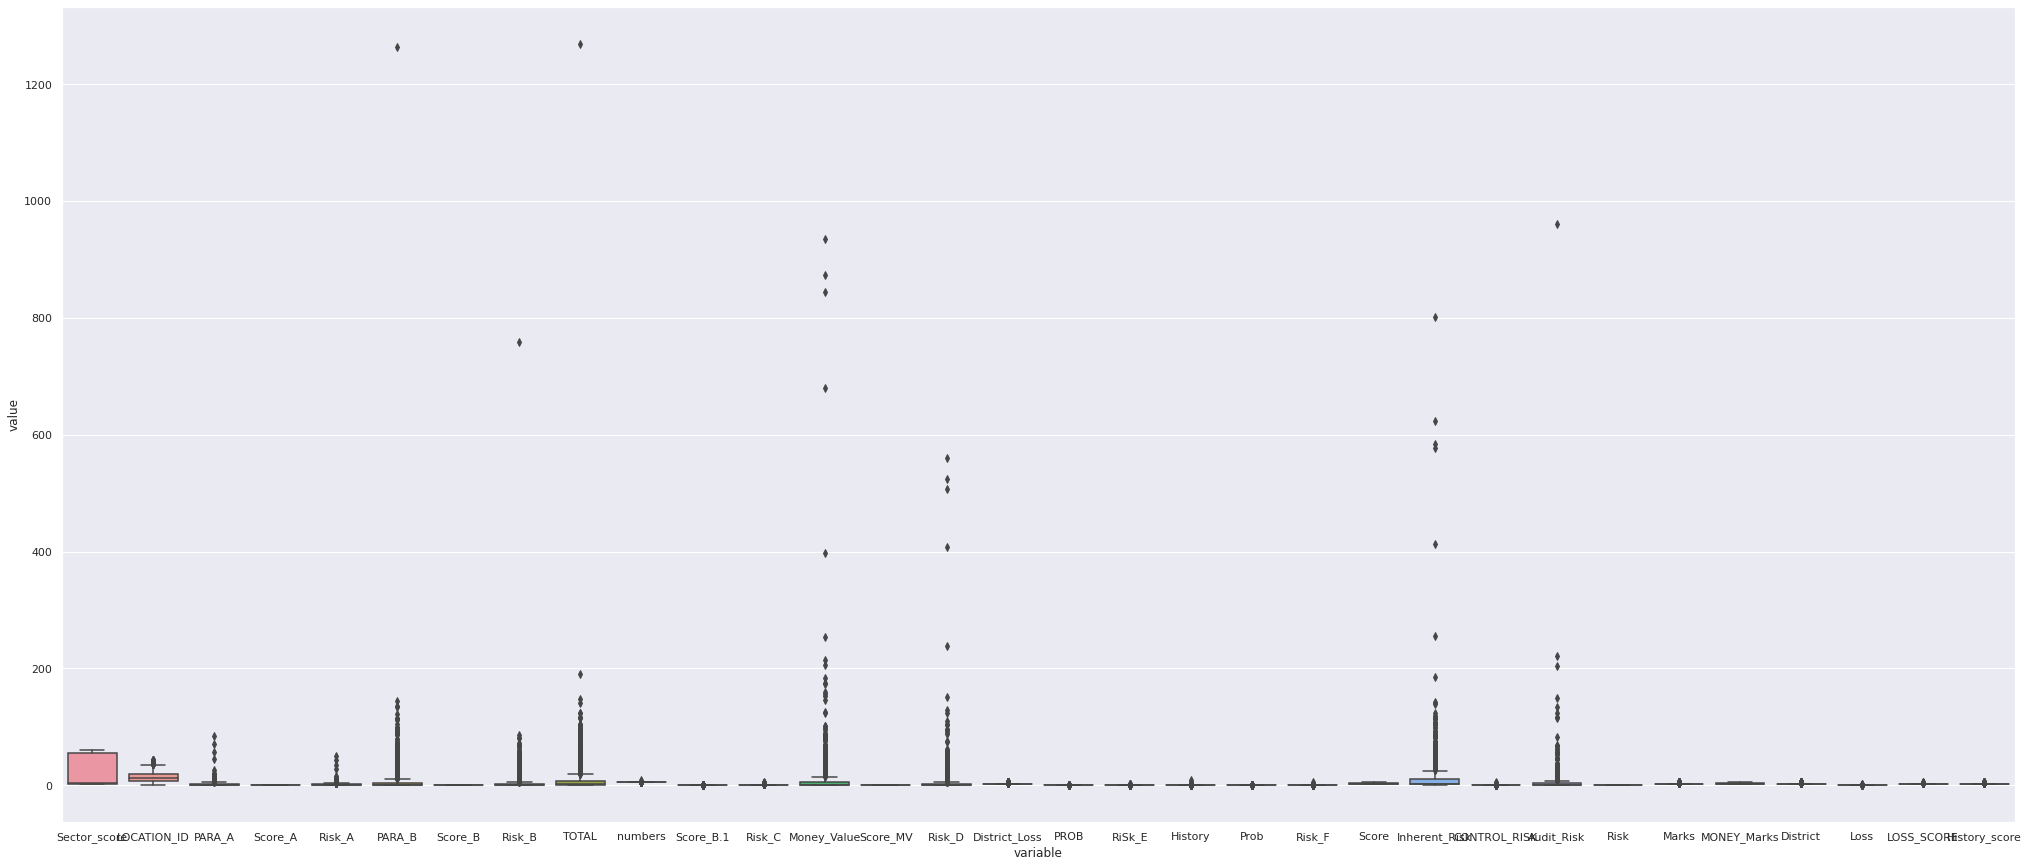

In [29]:
boxplot(df)

In [30]:
# men-drop 3 variable yang mempunyai pecilan yang banyak
df = df.drop(['Money_Value'], axis = 1)
df = df.drop(['Risk_D'], axis = 1)
df = df.drop(['Inherent_Risk'], axis = 1)

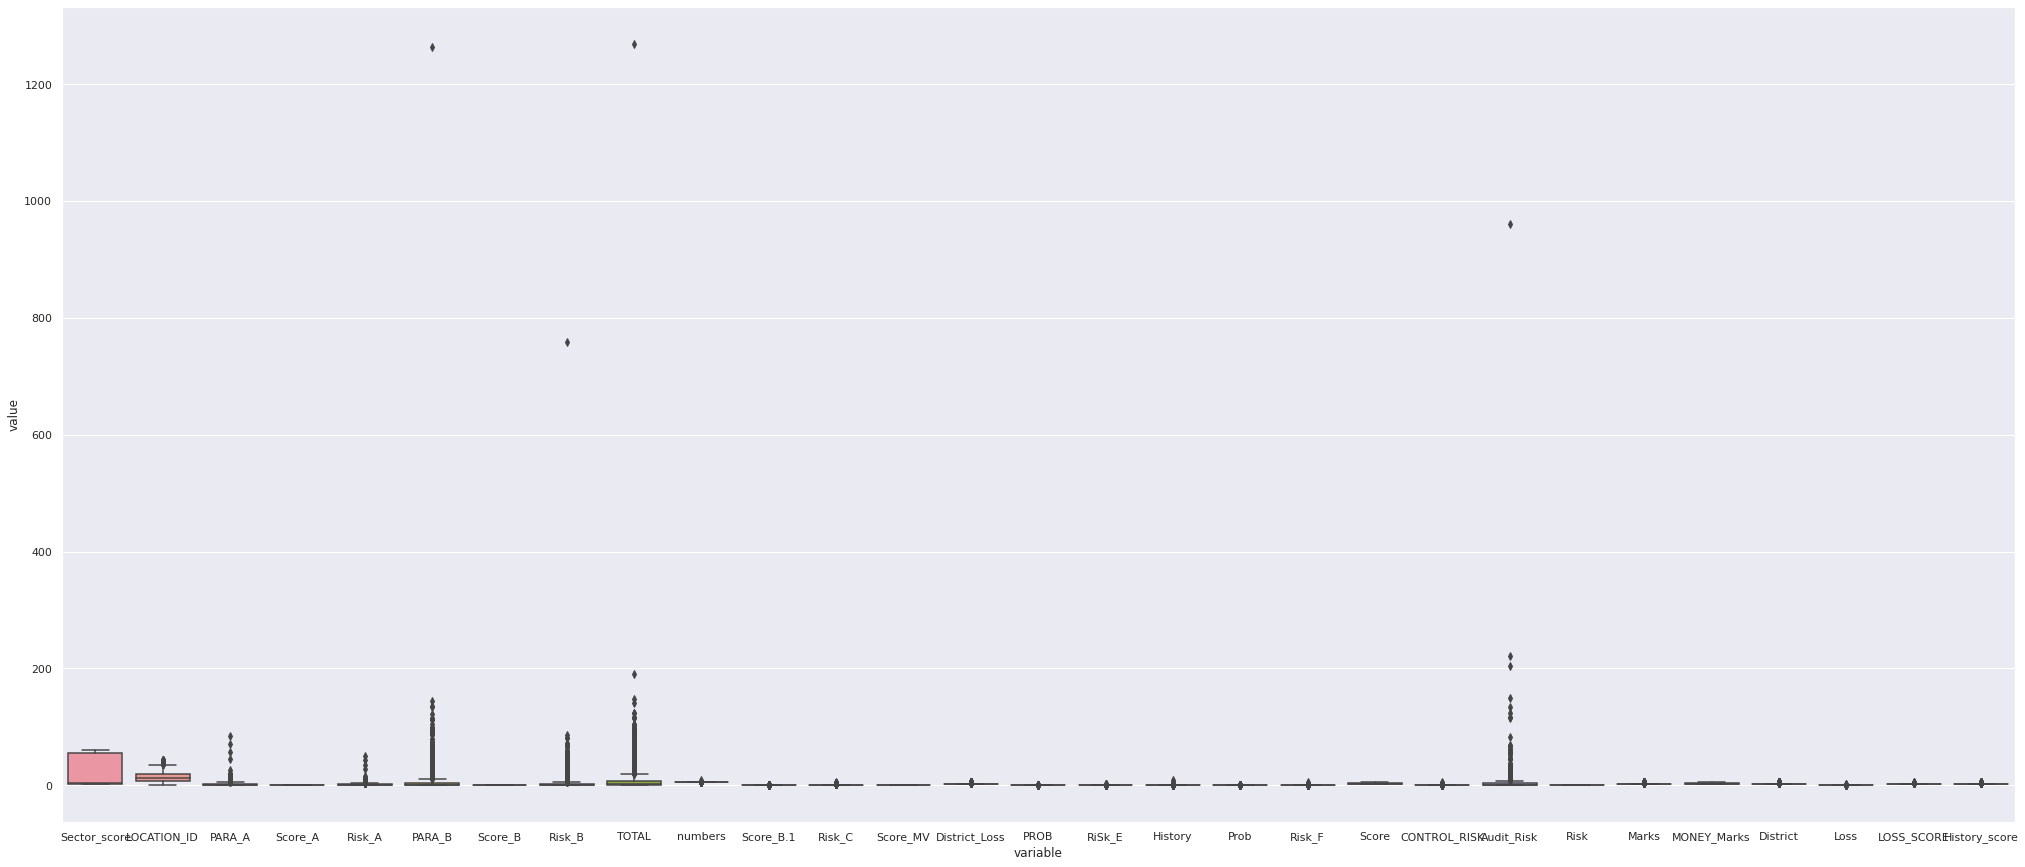

In [31]:
boxplot(df)

## **Klasifikasi dan Data Split**

In [32]:
class_df = df.drop("Audit_Risk", axis = 1)

In [33]:
klasifikasi_X = class_df.drop(["Risk"], axis = 1)
klasifikasi_y = class_df["Risk"]

In [34]:
X_train_awal, X_test_awal, y_train, y_test = train_test_split(klasifikasi_X, klasifikasi_y, test_size = 0.25, random_state = 5)

In [35]:
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train_awal)
X_test  = scale.transform(X_test_awal)

## **Model dengan ANN**

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=27, input_dim=27),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='tanh')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 dense_1 (Dense)             (None, 32)                896       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,741
Trainable params: 2,741
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 50, batch_size = 50)

Epoch 1/50
12/12 [==============================] - 1s 3ms/step - loss: 0.6535 - accuracy: 0.6684
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.8526
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2745 - accuracy: 0.8877
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.9263
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2027 - accuracy: 0.9316
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 0.9509
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9614
Epoch 8/50
12/12 [==============================] - 0s 4ms/step - loss: 0.1533 - accuracy: 0.9632
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1382 - accuracy: 0.9649
Epoch 10/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.9614
Epoch 11/50
12/12 [

In [38]:
print("Evaluasi data ")
results = model.evaluate(X_test, y_test, batch_size=128)

Evaluasi data 
2/2 [==============================] - 0s 7ms/step - loss: 0.0539 - accuracy: 0.9895


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


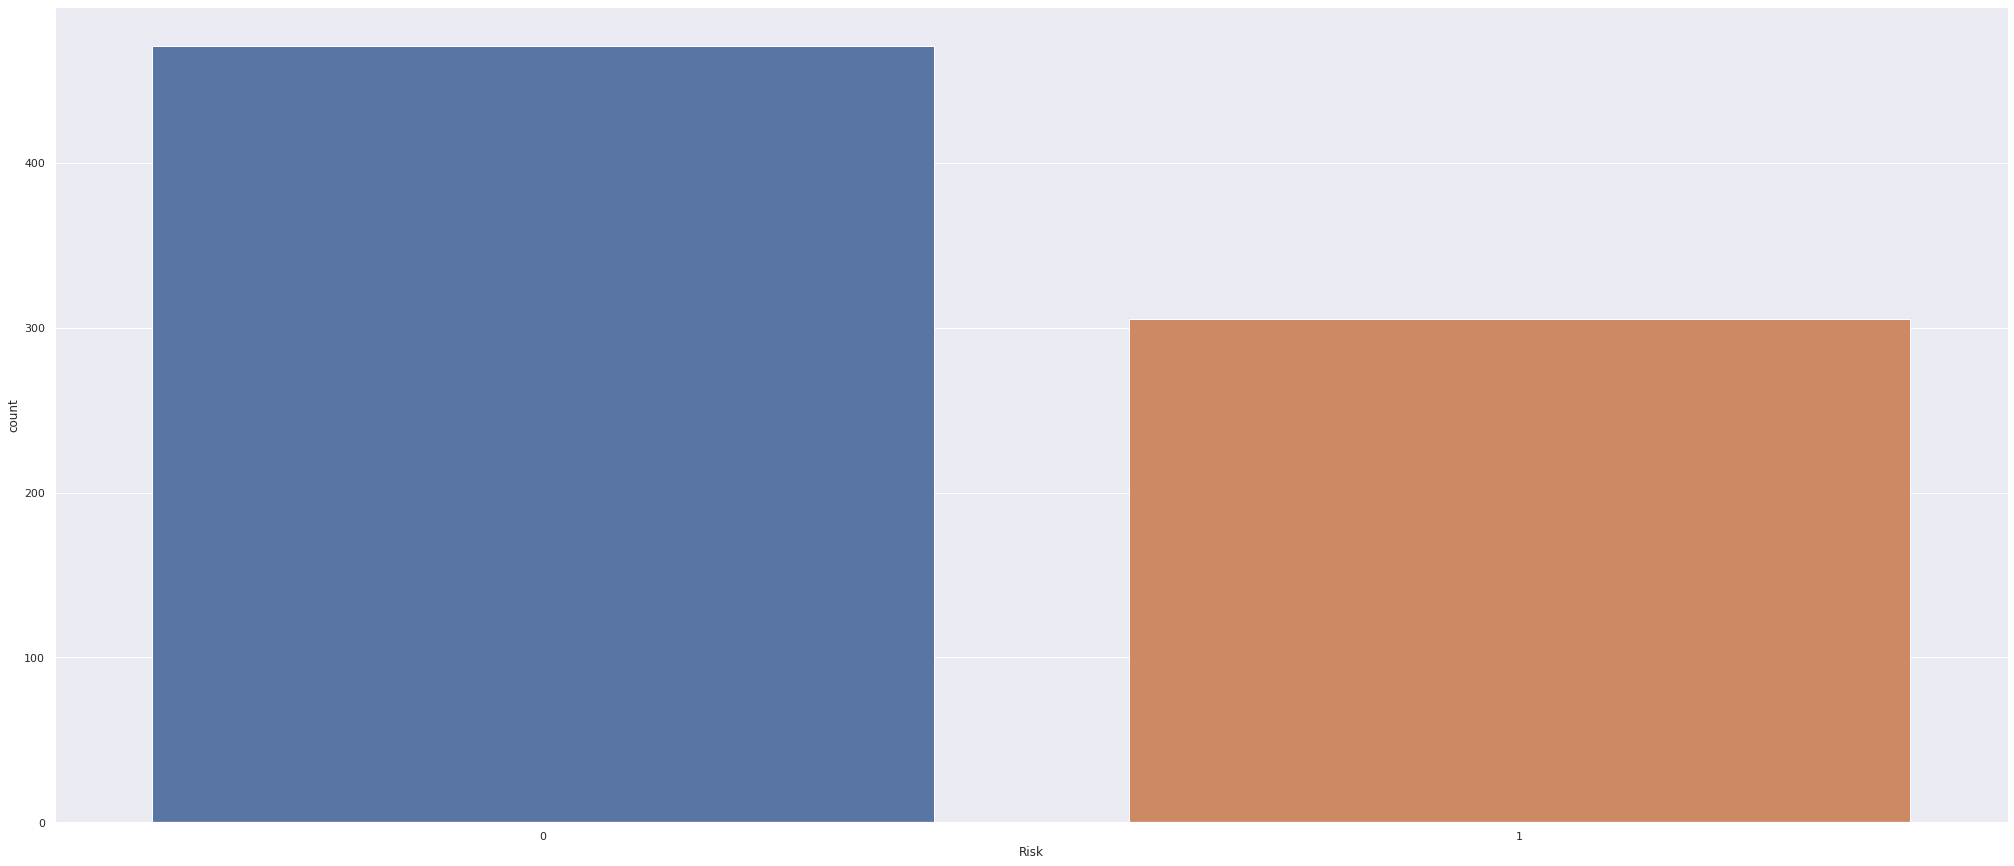

In [39]:
sns.countplot(audit['Risk'])